In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column', 75)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_2017=pd.read_csv('2017.csv')
df_2018=pd.read_csv('2018.csv')
df_2019=pd.read_csv('2019.csv')
df_2020=pd.read_csv('2020.csv')
df_2021=pd.read_csv('2021.csv')

In [3]:
df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021], ignore_index=True)

In [4]:
df.shape

(1836, 151)

In [5]:
df.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,...,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID,Does your employer provide mental health benefits as part of healthcare coverage?,"If you have a mental health disorder, how often do you

In [6]:
percent_missing = df.isnull().sum() * 100/ len(df)
pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

,column_name,percent_missing
#,#,19.172113
<strong>Are you self-employed?</strong>,<strong>Are you self-employed?</strong>,36.111111
How many employees does your company or organization have?,How many employees does your company or organi...,14.106754
Is your employer primarily a tech company/organization?,Is your employer primarily a tech company/orga...,14.106754
Is your primary role within your company related to tech/IT?,Is your primary role within your company relat...,14.106754
Does your employer provide mental health benefits as part of healthcare coverage?,Does your employer provide mental health benef...,64.978214
Do you know the options for mental health care available under your employer-provided health coverage?,Do you know the options for mental health care...,22.984749
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Has your employer ever formally discussed ment...,14.106754
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Does your employer offer resources to learn mo...,14.106754
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Is your anonymity protected if you choose to t...,14.106754


# Data Preprocessing 

## Data Cleaning

In [7]:
col_renames = {
    '<strong>Are you self-employed?</strong>': 'self_employed_1',
    '*Are you self-employed?*': 'self_employed_2',
    '<strong>Do you have previous employers?</strong>': 'previous_employers',
    'How many employees does your company or organization have?': 'number_of_employees',
    'Is your employer primarily a tech company/organization?': 'Tech_now',
    'Was your employer primarily a tech company/organization?': 'Tech_past',
    'Is your primary role within your company related to tech/IT?': 'job_tech',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits_now',
    '<strong>Have your previous employers provided mental health benefits?</strong>': 'benefits_past',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'workplace_resources_now',
    'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?': 'workplace_resources_past',
    'Have you ever discussed your mental health with your employer?': 'mh_employer_discussion',
    'Have you ever discussed your mental health with coworkers?': 'mh_coworker_discussion',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'treatment_demand',
    'Do you have a family history of mental illness?': 'family_history',
    'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?': 'medical_coverage',
    'How willing would you be to share with friends and family that you have a mental illness?': 'mh_share',
    'Are you openly identified at work as a person with a mental health issue?': 'mh_identified',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you <strong>live</strong> in?': 'country_1',
    'What country do you *live* in?': 'country_2',
    'Do you currently have a mental health disorder?': 'mental_health_1',
    'Do you *currently* have a mental health disorder?': 'mental_health_2'
}
selected_columns = list(col_renames.keys())
df = df[selected_columns]
df = df.rename(columns=col_renames)

In [8]:
replacement_male = {
    'Male', 'male', 'M', 'm', 'Man', 'man', 'cis male', 'Cis-male', 'Cis Male', 'MALE', 'male/he/him', 'MAle',
    'Identify as male', 'cis-het male', 'cisgender male', 'Cishet male', 'mostly male', 'cis male', 'Male, cis',
    'My sex is female.', 'Male (or female, or both)', 'Malel', 'cis-Female', 'Ostensibly Male', 'male (hey this is the tech industry you\'re talking about)', 
    'Male (cis)', 'male, born with xy chromosoms', 'male/androgynous', 'Mail', 'cis-male'
}

replacement_female = {
    'Female', 'female', 'F', 'f', 'Woman', 'woman', 'cis female', 'Cis female', 'FEMALE', 'Female (cis)', 'Female-identified', 'Female (cis)', 
    'female (cisgender)', 'I identify as female', 'Cis woman', 'Female (cisgender)', 'Cis-Female', 'I identify as female', 'Female-ish', 
    'F, cisgender', 'cis female'
}

replacement_other = {
    'Nonbinary', 'Non-binary', 'None', 'agender', 'Non binary', 'Genderqueer', 'Nonbinary/femme', 'NB', 'cisgender female', 'SWM', 
    'Femile', 'homem cis', 'Let\'s keep it simple and say "male"', 'She/her/they/them', 'non-binary', 'Trans female', 'none', 'Demiguy', 
    'Other', 'Identify as male', '43', 'mail', 'Non-binary and gender fluid', 'Trans non-binary/genderfluid', 'Make', 'female, she/her', 
    'genderfluid', 'masculino', 'femmina', 'Agender trans woman', 'rr', 'I have a penis', 'Questioning', 'I am a Wookie', '*shrug emoji* (F)', 
    'Trans woman', 'Cisgendered woman', 'Woman-identified', 'sometimes', 'Male-ish', 'Agender/genderfluid', 'God King of the Valajar', 
    'uhhhhhhhhh fem genderqueer?', 'femail', 'femalw', 'cis hetero male', 'cis woman', 'Contextual', 'Genderqueer demigirl', 
    'Genderqueer/non-binary', 'Cis-Female', 'Female/gender non-binary.', 'non binary', 'transgender', 'Agender', 'dude', 'Transfeminine', 
    'trans woman', '\-', 'nonbinary', 'Non-binary/Agender'
}

In [9]:
df['gender'].replace(replacement_male, 'male', inplace=True)
df['gender'].replace(replacement_female, 'female', inplace=True)
df['gender'].replace([val for val in df['gender'] if val not in replacement_male and val not in replacement_female], 'other', inplace=True)

In [10]:
df['benefits_now'] = df['benefits_now'].replace('Not eligible for coverage / NA', 'No')
df['benefits_past'] = df['benefits_past'].replace('Some did', 'Yes')
df['benefits_past'] = df['benefits_past'].replace('No, none did', 'No')
df['benefits_past'] = df['benefits_past'].replace('Yes, they all did', 'Yes')

df['workplace_resources_past'] = df['workplace_resources_past'].replace('Some did', 'Yes')
df['workplace_resources_past'] = df['workplace_resources_past'].replace('None did', 'No')
df['workplace_resources_past'] = df['workplace_resources_past'].replace('Yes, they all did', 'Yes')

In [11]:
df['self_employed_1'] = df['self_employed_1'].map({0.0:'No',1.0:'Yes'})
df['self_employed_2'] = df['self_employed_2'].map({False:'No',True:'Yes'})

df['previous_employers'] = df['previous_employers'].map({0.0:'No',1.0:'Yes'})

df['Tech_past'] = df['Tech_past'].map({0.0:'No',1.0:'Yes'})
df['Tech_now'] = df['Tech_now'].map({0.0:'No',1.0:'Yes'})
df['job_tech'] = df['job_tech'].map({0.0:'No',1.0:'Yes'})

df['mh_employer_discussion'] = df['mh_employer_discussion'].map({0.0:'No',1.0:'Yes'})
df['mh_coworker_discussion'] = df['mh_coworker_discussion'].map({0.0:'No',1.0:'Yes'})

df['treatment_demand'] = df['treatment_demand'].map({0:'No',1:'Yes'})
df['mh_identified'] = df['mh_identified'].map({0.0:'No',1.0:'Yes'})
df['medical_coverage'] = df['medical_coverage'].map({0.0:'No',1.0:'Yes'})

In [12]:
df['job_tech'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [13]:
df=df[df['job_tech']=='Yes']
df.drop('job_tech',axis=1,inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mh_share,1463.0,6.451811,2.739031,0.0,5.0,7.0,9.0,10.0
age,1463.0,34.684211,9.566389,0.0,28.0,34.0,40.0,223.0


In [15]:
df=df[(df['age']>=16.0)&(df['age']!=223)]

In [16]:
if any((df['country_1'] != df['country_2']) & df['country_1'].notnull() & df['country_2'].notnull()):
    print("They have different values in at least one row where both are not null.")
else:
    print("All rows have the same values in both columns or at least one of the values is null.")

All rows have the same values in both columns or at least one of the values is null.


In [17]:
df['country'] = df['country_1'].fillna(df['country_2'])
df.drop('country_1',axis=1,inplace=True)
df.drop('country_2',axis=1,inplace=True)
df['country'].isnull().sum()

0

In [18]:
df['medical_coverage'].unique()

array([nan], dtype=object)

In [19]:
countries = ['United Kingdom','Switzerland','Germany','Canada','Iceland','Japan','Russia','Portugal','Czech Republic',
    'Finland','Australia','Sweden','Spain','Italy','France','Netherlands','New Zealand','Austria','Norway']
df.loc[(df['country'].isin(countries)), 'medical_coverage'] = 'Yes'

In [20]:
def fill_nan_by_country(row):
    return 'Yes' if pd.isna(row['medical_coverage']) else row['medical_coverage']

usa_nan_indices = df[(df['country'] == 'United States of America') & (df['medical_coverage'].isna())].index
hungary_nan_indices = df[(df['country'] == 'Hungary') & (df['medical_coverage'].isna())].index
turkey_nan_indices = df[(df['country'] == 'Turkey') & (df['medical_coverage'].isna())].index

# Randomly select 90%, 95%, and 98% of indices for USA, Hungary, and Turkey, respectively
usa_fill_indices = np.random.choice(usa_nan_indices, size=int(0.9 * len(usa_nan_indices)), replace=False)
hungary_fill_indices = np.random.choice(hungary_nan_indices, size=int(0.95 * len(hungary_nan_indices)), replace=False)
turkey_fill_indices = np.random.choice(turkey_nan_indices, size=int(0.98 * len(turkey_nan_indices)), replace=False)

# Fill selected indices with 'Yes'
df.loc[usa_fill_indices, 'medical_coverage'] = 'Yes'
df.loc[hungary_fill_indices, 'medical_coverage'] = 'Yes'
df.loc[turkey_fill_indices, 'medical_coverage'] = 'Yes'

In [21]:
# If a company is providing them health benefits, that means they have a medical coverage.
df.loc[df['benefits_now'] == 'Yes', 'medical_coverage'] = 'Yes'

In [22]:
print('Medical Coverage : Missing Values = ',df['medical_coverage'].isnull().sum())
print('The shape of our data is : ',df.shape)

Medical Coverage : Missing Values =  214
The shape of our data is :  (1461, 22)


In [23]:
df=df[df['medical_coverage']=='Yes']

In [24]:
print('The unique values of self_employed_1 are : ',df['self_employed_1'].unique())
print('The unique values of self_employed_2 are : ',df['self_employed_2'].unique())

The unique values of self_employed_1 are :  ['No' nan]
The unique values of self_employed_2 are :  [nan 'No']


In [25]:
df.drop('self_employed_1',axis=1,inplace=True)
df.drop('self_employed_2',axis=1,inplace=True)

In [26]:
if any((df['mental_health_1'] != df['mental_health_2']) & df['mental_health_1'].notnull() & df['mental_health_2'].notnull()):
    print("They have different values in at least one row where both are not null.")
else:
    print("All rows have the same values in both columns or at least one of the values is null.")

All rows have the same values in both columns or at least one of the values is null.


In [27]:
df['mental_health'] = df['mental_health_1'].fillna(df['mental_health_2'])
df.drop('mental_health_1',axis=1,inplace=True)
df.drop('mental_health_2',axis=1,inplace=True)

## Imputing Missing Values

In [28]:
from scipy.stats import chi2_contingency
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    
    """"
        This function returns the result of Chi2 test. It tests if there is any significant relationship between two categorical
        variables
        
    df: our dataframe 
    input_var : the variable that we will test its impact on our target variable
    target_var : the target variable 
    significance_level : by default is 5% which is the risks' level 

    """
    
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p < significance_level:
        print(f'\033[32m{input_var} has a significant relationship with the ', target_var ,' variable.\033[0m')
    else:
        print(f'\033[31m{input_var} does not have a significant relationship with the', target_var ,'  variable.\033[0m')

In [29]:
def combination_percent(df,col1,col2,col3):
    
    """"
        This function returns the different combination between three columns 
    
    df: our dataframe 
    col1 : the first column
    col2 : the second column
    col3 : the third column
    
    """
    
    combination_counts = df.groupby([col1, col2, col3]).size()
    combination_percentages = combination_counts / len(df) * 100
    for combination, percentage in zip(combination_counts.index, combination_percentages):
        print(f"{combination}\t{percentage:.2f}%")

In [30]:
percent_missing = df.isnull().sum() * 100/ len(df)
pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

,column_name,percent_missing
previous_employers,previous_employers,33.279872
number_of_employees,number_of_employees,0.000000
Tech_now,Tech_now,0.000000
Tech_past,Tech_past,13.793103
benefits_now,benefits_now,41.539695
benefits_past,benefits_past,41.218925
workplace_resources_now,workplace_resources_now,0.000000
workplace_resources_past,workplace_resources_past,13.793103
mh_employer_discussion,mh_employer_discussion,0.000000
mh_coworker_discussion,mh_coworker_discussion,0.160385


In [31]:
for c in ['treatment_demand','mh_identified','mh_employer_discussion']:
    chi_squared_test(df, c, 'mh_coworker_discussion')

treatment_demand has a significant relationship with the  mh_coworker_discussion  variable.
mh_identified has a significant relationship with the  mh_coworker_discussion  variable.
mh_employer_discussion has a significant relationship with the  mh_coworker_discussion  variable.


In [32]:
combination_percent(df,'mh_identified','mh_employer_discussion','mh_coworker_discussion')

('No', 'No', 'No')	46.27%
('No', 'No', 'Yes')	17.72%
('No', 'Yes', 'No')	6.66%
('No', 'Yes', 'Yes')	16.76%
('Yes', 'No', 'No')	0.80%
('Yes', 'No', 'Yes')	1.84%
('Yes', 'Yes', 'No')	0.72%
('Yes', 'Yes', 'Yes')	9.06%


In [33]:
combination_percent(df,'treatment_demand','mh_employer_discussion','mh_coworker_discussion')

('No', 'No', 'No')	26.30%
('No', 'No', 'Yes')	5.53%
('No', 'Yes', 'No')	2.65%
('No', 'Yes', 'Yes')	3.13%
('Yes', 'No', 'No')	20.77%
('Yes', 'No', 'Yes')	14.03%
('Yes', 'Yes', 'No')	4.73%
('Yes', 'Yes', 'Yes')	22.69%


In [34]:
print(df.groupby(['treatment_demand', 'mh_coworker_discussion']).size().unstack())
print('*************************')
print(df.groupby(['mh_identified', 'mh_coworker_discussion']).size().unstack())
print('*************************')
print(df.groupby(['mh_employer_discussion', 'mh_coworker_discussion']).size().unstack())

mh_coworker_discussion   No  Yes
treatment_demand                
No                      361  108
Yes                     318  458
*************************
mh_coworker_discussion   No  Yes
mh_identified                   
No                      660  430
Yes                      19  136
*************************
mh_coworker_discussion   No  Yes
mh_employer_discussion          
No                      587  244
Yes                      92  322


In [35]:
conditions = ((df['treatment_demand'] == 'Yes') |(df['mh_identified'] == 'Yes') |(df['mh_employer_discussion'] == 'Yes')) & (df['mh_coworker_discussion'].isnull())

df.loc[conditions, 'mh_coworker_discussion'] = 'Yes'

conditions = (((df['mh_identified'] == 'No') & (df['mh_employer_discussion'] == 'No')) |
    ((df['treatment_demand'] == 'No') & (df['mh_employer_discussion'] == 'No'))) & (df['mh_coworker_discussion'].isnull())

df.loc[conditions, 'mh_coworker_discussion'] = 'No'

print('The number of missing values in mh_coworker_discussion is : ',df['mh_coworker_discussion'].isnull().sum())

The number of missing values in mh_coworker_discussion is :  0


In [36]:
for c in ['mh_employer_discussion','mh_coworker_discussion','workplace_resources_now','treatment_demand','mh_identified']:
    chi_squared_test(df, c, 'workplace_resources_past')

mh_employer_discussion does not have a significant relationship with the workplace_resources_past   variable.
mh_coworker_discussion does not have a significant relationship with the workplace_resources_past   variable.
workplace_resources_now has a significant relationship with the  workplace_resources_past  variable.
treatment_demand has a significant relationship with the  workplace_resources_past  variable.
mh_identified does not have a significant relationship with the workplace_resources_past   variable.


In [37]:
print(df.groupby(['workplace_resources_past', 'workplace_resources_now']).size().unstack())
print('*************************')
print(df.groupby(['treatment_demand', 'workplace_resources_now']).size().unstack())

workplace_resources_now   I don't know   No  Yes
workplace_resources_past                        
No                                 185  310  172
Yes                                126  100  182
*************************
workplace_resources_now  I don't know   No  Yes
treatment_demand                               
No                                151  184  135
Yes                               193  307  277


In [38]:
combination_percent(df,'treatment_demand','workplace_resources_past','workplace_resources_now')

('No', 'No', "I don't know")	6.58%
('No', 'No', 'No')	9.06%
('No', 'No', 'Yes')	5.13%
('No', 'Yes', "I don't know")	3.93%
('No', 'Yes', 'No')	2.49%
('No', 'Yes', 'Yes')	3.61%
('Yes', 'No', "I don't know")	8.26%
('Yes', 'No', 'No')	15.80%
('Yes', 'No', 'Yes')	8.66%
('Yes', 'Yes', "I don't know")	6.17%
('Yes', 'Yes', 'No')	5.53%
('Yes', 'Yes', 'Yes')	10.99%


In [39]:
conditions = (df['treatment_demand'] == 'Yes')  & df['workplace_resources_past'].isnull()
df.loc[conditions, 'workplace_resources_past'] = 'Yes'

conditions = (df['workplace_resources_now'] != 'Yes')  & df['workplace_resources_past'].isnull()
df.loc[conditions, 'workplace_resources_past'] = 'No'

conditions = (df['workplace_resources_now'] == 'Yes')  & df['workplace_resources_past'].isnull()
df.loc[conditions, 'workplace_resources_past'] = 'Yes'

print('The number of missing values in workplace_resources_past is : ',df['workplace_resources_past'].isnull().sum())

The number of missing values in workplace_resources_past is :  0


In [40]:
for c in ['mh_employer_discussion','mh_coworker_discussion','workplace_resources_past','workplace_resources_now',
          'treatment_demand','mh_identified']:
    chi_squared_test(df, c, 'benefits_past')

mh_employer_discussion does not have a significant relationship with the benefits_past   variable.
mh_coworker_discussion does not have a significant relationship with the benefits_past   variable.
workplace_resources_past has a significant relationship with the  benefits_past  variable.
workplace_resources_now has a significant relationship with the  benefits_past  variable.
treatment_demand has a significant relationship with the  benefits_past  variable.
mh_identified does not have a significant relationship with the benefits_past   variable.


In [41]:
print(df.groupby(['workplace_resources_past', 'benefits_past']).size().unstack())
print('*************************')
print(df.groupby(['workplace_resources_now', 'benefits_past']).size().unstack())
print('*************************')
print(df.groupby(['treatment_demand', 'benefits_past']).size().unstack())

benefits_past             I don't know   No  Yes
workplace_resources_past                        
No                                 140  135  188
Yes                                 31    8  231
*************************
benefits_past            I don't know  No  Yes
workplace_resources_now                       
I don't know                       65  31  125
No                                 64  74  150
Yes                                42  38  144
*************************
benefits_past     I don't know  No  Yes
treatment_demand                       
No                          90  58  115
Yes                         81  85  304


In [42]:
print(df.groupby(['benefits_past', 'workplace_resources_past']).size().unstack())
print('*************************')
print(df.groupby(['benefits_past', 'workplace_resources_now']).size().unstack())
print('*************************')
print(df.groupby(['benefits_past', 'treatment_demand']).size().unstack())

workplace_resources_past   No  Yes
benefits_past                     
I don't know              140   31
No                        135    8
Yes                       188  231
*************************
workplace_resources_now  I don't know   No  Yes
benefits_past                                  
I don't know                       65   64   42
No                                 31   74   38
Yes                               125  150  144
*************************
treatment_demand   No  Yes
benefits_past             
I don't know       90   81
No                 58   85
Yes               115  304


In [43]:
conditions = ((df['workplace_resources_past'] == 'Yes') | (df['workplace_resources_now'] == 'Yes')| 
              (df['treatment_demand'] == 'Yes'))  & df['benefits_past'].isnull()
df.loc[conditions, 'benefits_past'] = 'Yes'

conditions = ((df['workplace_resources_past'] != 'Yes') | (df['workplace_resources_past']!='Yes')) & df['benefits_past'].isnull()
df.loc[conditions, 'benefits_past'] = 'No'

print('The number of missing values in benefits_past is : ',df['benefits_past'].isnull().sum())

The number of missing values in benefits_past is :  0


In [44]:
for c in ['mh_employer_discussion','mh_coworker_discussion','workplace_resources_past','workplace_resources_now',
          'treatment_demand','mh_identified','benefits_past']:
    chi_squared_test(df, c, 'benefits_now')

mh_employer_discussion has a significant relationship with the  benefits_now  variable.
mh_coworker_discussion has a significant relationship with the  benefits_now  variable.
workplace_resources_past has a significant relationship with the  benefits_now  variable.
workplace_resources_now has a significant relationship with the  benefits_now  variable.
treatment_demand has a significant relationship with the  benefits_now  variable.
mh_identified has a significant relationship with the  benefits_now  variable.
benefits_past has a significant relationship with the  benefits_now  variable.


In [45]:
print(df.groupby(['mh_employer_discussion', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['mh_coworker_discussion', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['benefits_past', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['workplace_resources_past', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['workplace_resources_now', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['mh_identified', 'benefits_now']).size().unstack())
print('*************************')
print(df.groupby(['treatment_demand', 'benefits_now']).size().unstack())

benefits_now            I don't know  No  Yes
mh_employer_discussion                       
No                               143  65  279
Yes                               33  32  177
*************************
benefits_now            I don't know  No  Yes
mh_coworker_discussion                       
No                               123  55  213
Yes                               53  42  243
*************************
benefits_now   I don't know  No  Yes
benefits_past                       
I don't know             23   8   33
No                       59  29   53
Yes                      94  60  370
*************************
benefits_now              I don't know  No  Yes
workplace_resources_past                       
No                                 117  61  228
Yes                                 59  36  228
*************************
benefits_now             I don't know  No  Yes
workplace_resources_now                       
I don't know                       73  17  105
No        

In [46]:
print(df.groupby(['benefits_now', 'mh_employer_discussion']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'mh_coworker_discussion']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'benefits_past']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'workplace_resources_past']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'workplace_resources_now']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'mh_identified']).size().unstack())
print('*************************')
print(df.groupby(['benefits_now', 'treatment_demand']).size().unstack())

mh_employer_discussion   No  Yes
benefits_now                    
I don't know            143   33
No                       65   32
Yes                     279  177
*************************
mh_coworker_discussion   No  Yes
benefits_now                    
I don't know            123   53
No                       55   42
Yes                     213  243
*************************
benefits_past  I don't know  No  Yes
benefits_now                        
I don't know             23  59   94
No                        8  29   60
Yes                      33  53  370
*************************
workplace_resources_past   No  Yes
benefits_now                      
I don't know              117   59
No                         61   36
Yes                       228  228
*************************
workplace_resources_now  I don't know   No  Yes
benefits_now                                   
I don't know                       73   79   24
No                                 17   72    8
Yes           

In [47]:
conditions = ((df['mh_employer_discussion'] == 'Yes') | (df['mh_coworker_discussion'] == 'Yes')| 
              (df['benefits_past'] == 'Yes')| (df['workplace_resources_past']=='Yes')| (df['mh_identified']=='Yes')
             | df['treatment_demand'])  & df['benefits_now'].isnull()
df.loc[conditions, 'benefits_now'] = 'Yes'

conditions = ((df['mh_employer_discussion'] == 'No') | (df['mh_coworker_discussion']!='No') 
             | (df['mh_identified']=='No')| (df['workplace_resources_now']=='No')) & df['benefits_now'].isnull()
df.loc[conditions, 'benefits_now'] = "I don't know"

conidtions= (df['workplace_resources_past']=='No') & df['benefits_now'].isnull()
df.loc[conditions, 'benefits_now'] = 'No'

print('The number of missing values in benefits_now is : ',df['benefits_now'].isnull().sum())

The number of missing values in benefits_now is :  0


In [48]:
chi_squared_test(df, 'Tech_now', 'Tech_past')

Tech_now has a significant relationship with the  Tech_past  variable.


In [49]:
chi_squared_test(df, 'gender', 'Tech_past')

gender does not have a significant relationship with the Tech_past   variable.


In [50]:
print(df.groupby(['Tech_past', 'Tech_now']).size().unstack())

Tech_now    No  Yes
Tech_past          
No         151  206
Yes        144  574


In [51]:
print(df.groupby(['gender', 'Tech_past']).size().unstack())

Tech_past   No  Yes
gender             
female     114  183
male       213  482
other       30   53


In [52]:
df.loc[((df['Tech_now'] == 'Yes') | ((df['gender'] == 'male') | (df['gender'] == 'female'))) & df['Tech_past'].isnull(), 'Tech_past'] = 'Yes'
df.loc[conditions, 'Tech_past'] = 'Yes'

In [53]:
print('The number of missing values in Tech_past is : ',df['Tech_past'].isnull().sum())

The number of missing values in Tech_past is :  2


In [54]:
df = df[df['Tech_past'].notna()]

In [55]:
chi_squared_test(df, 'Tech_past', 'previous_employers')

Tech_past has a significant relationship with the  previous_employers  variable.


In [56]:
print(df.groupby(['Tech_past', 'previous_employers']).size().unstack())

previous_employers    No    Yes
Tech_past                      
No                   NaN  230.0
Yes                 98.0  503.0


In [57]:
conditions = (df['Tech_past'] == 'Yes') & df['previous_employers'].isnull()
df.loc[conditions, 'previous_employers'] = 'Yes'

In [58]:
df = df[df['previous_employers'].notna()]

# EDA

In [59]:
colors = sns.color_palette('pastel')[0:5]

In [60]:
def pie_chart(df, column):
    """"
        This function return a pie graph for a particular column.
        
    df: our dataframe
    column: our column
        
    """
    
    column_counts = df.groupby([column]).size()
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(f'Proportions of {column} in tech industry')
    plt.axis('equal')  
    plt.show()

In [61]:
def plot_mental_health_percentage(df, target='mental_health', c=None, colors=colors):
    """"
        This function returns the distribution of each unique value regarding we have a mental health issue. 
    
    df: our dataframe 
    target: our target and by default is mental_health
    c: our column that we will plot the distribution of its unique values 
    colors : the colors the we will use to plot 
    
    """
    total_mental_health_count = ((df[target] == 'Yes')).sum()
    mental_health_counts = df[df[target].isin(['Yes'])][c].value_counts()
    percentage_data = (mental_health_counts / total_mental_health_count) * 100
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=colors)
    plt.title(f'Percentage of each {c} with mental health issue')
    plt.xlabel(c)
    plt.ylabel('Percentage')
    ax.bar_label(ax.containers[0], fmt='%.2f%%')
    plt.show()

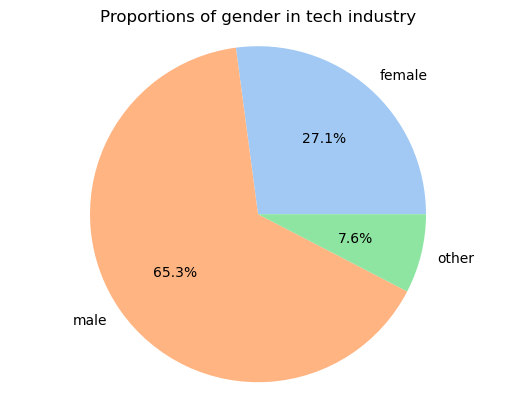

In [62]:
pie_chart(df,'gender')

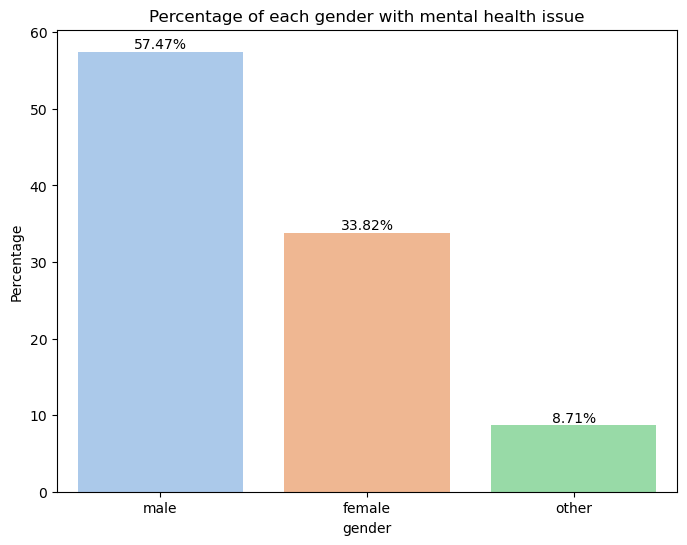

In [63]:
plot_mental_health_percentage(df,'mental_health','gender',colors)

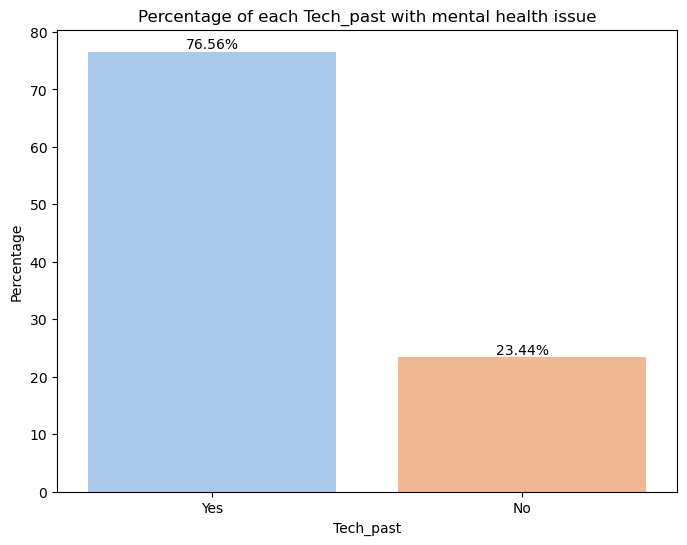

In [64]:
plot_mental_health_percentage(df,'mental_health','Tech_past',colors)

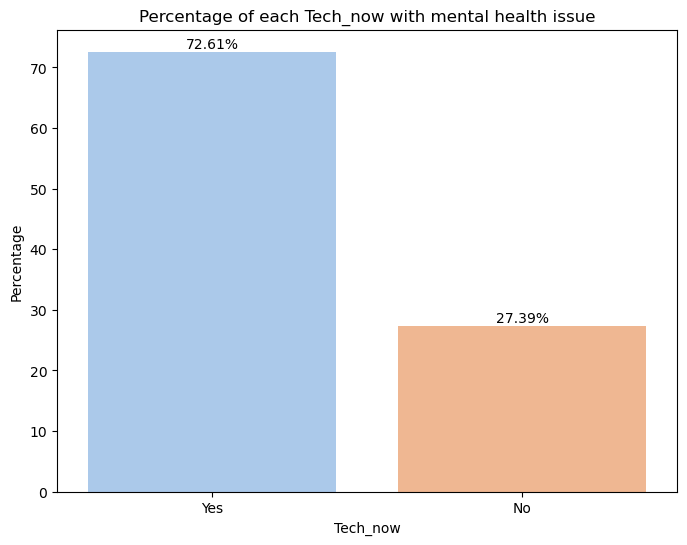

In [65]:
plot_mental_health_percentage(df,'mental_health','Tech_now',colors)

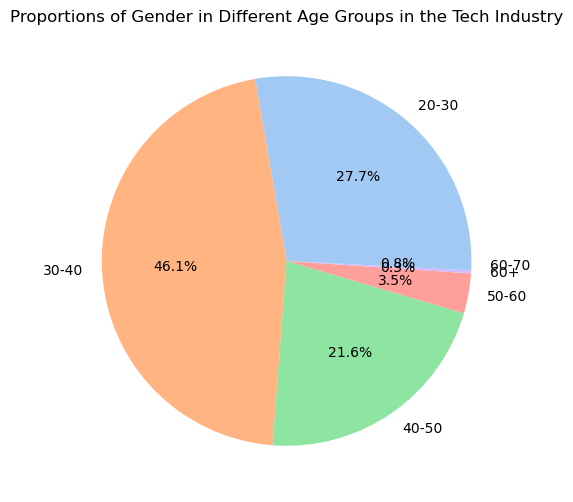

In [66]:
df_1=df.copy()
age_groups = [(20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]
def get_age_group(age):
    for group in age_groups:
        if group[0] <= age < group[1]:
            return f"{group[0]}-{group[1]}"
    return f"{age_groups[-1][0]}+"

df_1['Age_Group'] = df_1['age'].apply(get_age_group)
age_group_sizes = df_1.groupby('Age_Group').size()
plt.figure(figsize=(8, 6))
age_group_sizes.plot(kind='pie', autopct='%1.1f%%', labels=age_group_sizes.index,colors=colors)
plt.title('Proportions of Gender in Different Age Groups in the Tech Industry')
plt.ylabel('')
plt.show()

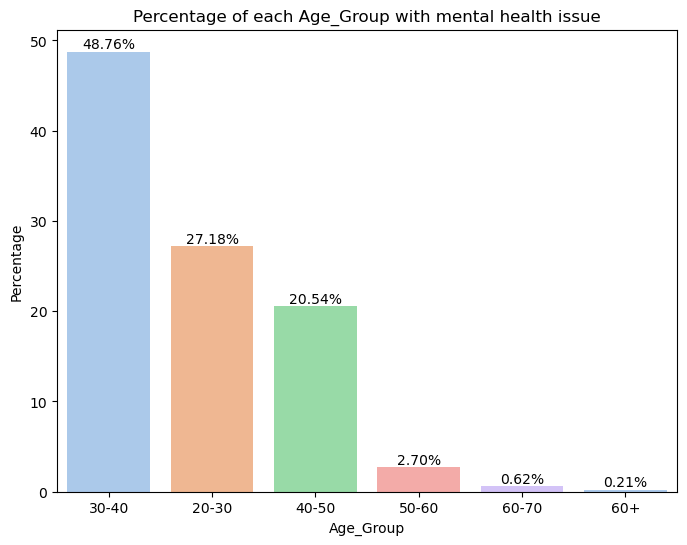

In [67]:
plot_mental_health_percentage(df_1,'mental_health','Age_Group',colors)

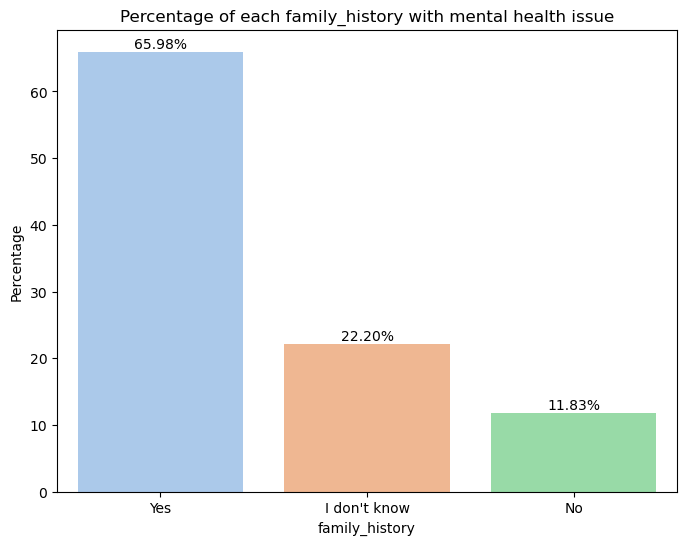

In [68]:
plot_mental_health_percentage(df,'mental_health','family_history',colors)

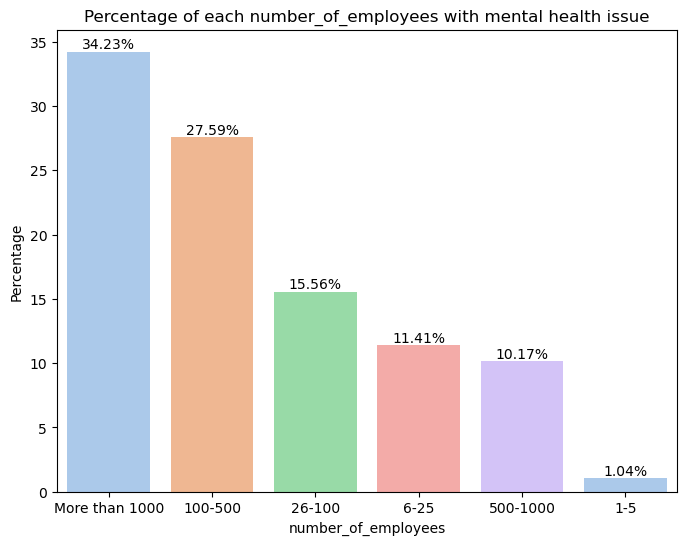

In [69]:
plot_mental_health_percentage(df,'mental_health','number_of_employees',colors)

In [70]:
chi_squared_test(df, 'number_of_employees', 'mental_health')

number_of_employees has a significant relationship with the  mental_health  variable.


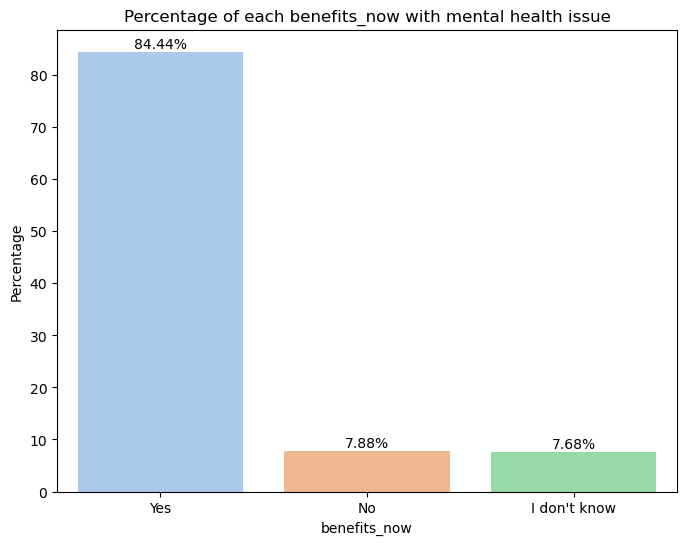

In [71]:
plot_mental_health_percentage(df,'mental_health','benefits_now',colors)

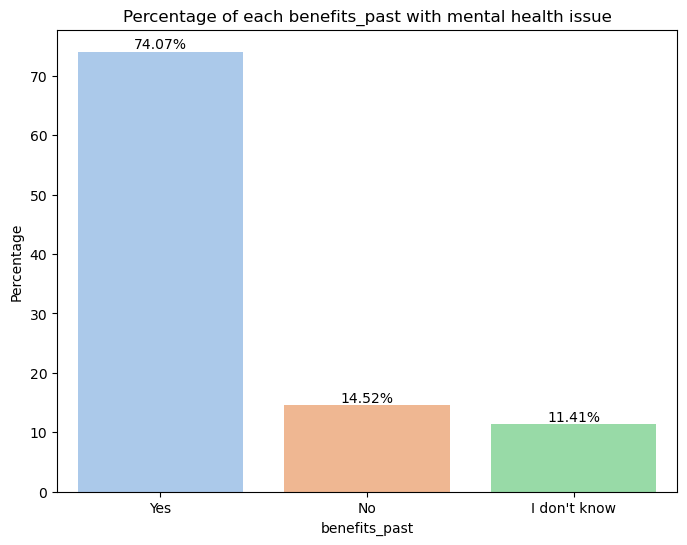

In [72]:
plot_mental_health_percentage(df,'mental_health','benefits_past',colors)

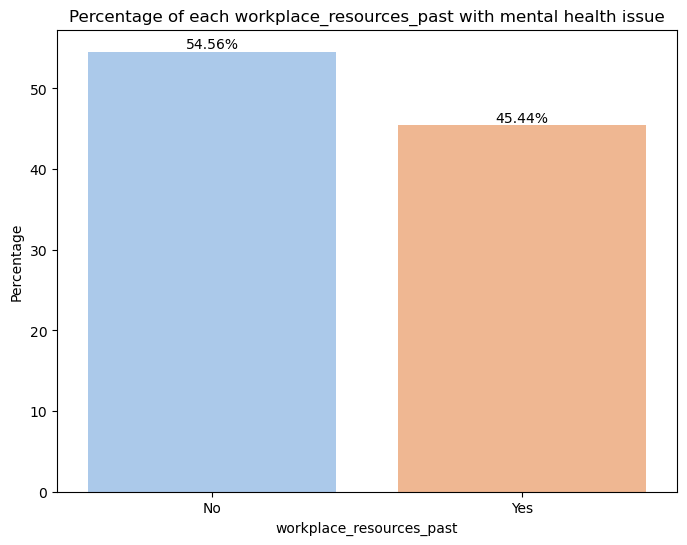

In [73]:
plot_mental_health_percentage(df,'mental_health','workplace_resources_past',colors)

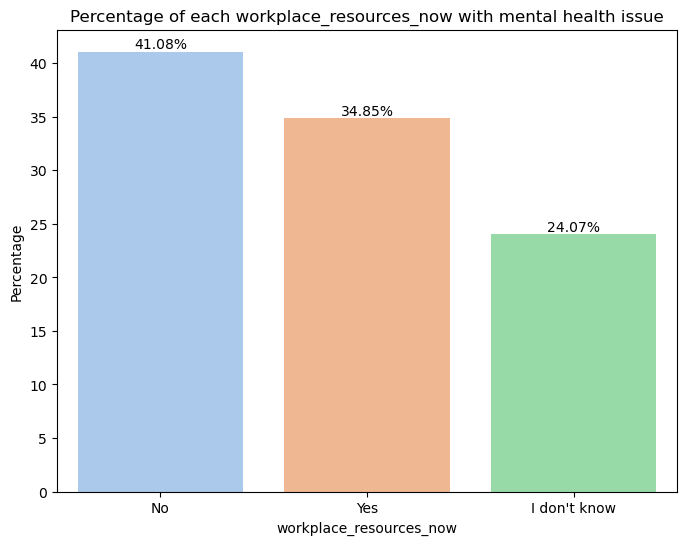

In [74]:
plot_mental_health_percentage(df,'mental_health','workplace_resources_now',colors)

In [75]:
chi_squared_test(df, 'workplace_resources_now', 'mental_health')

workplace_resources_now does not have a significant relationship with the mental_health   variable.


In [76]:
chi_squared_test(df, 'workplace_resources_past', 'mental_health')

workplace_resources_past has a significant relationship with the  mental_health  variable.


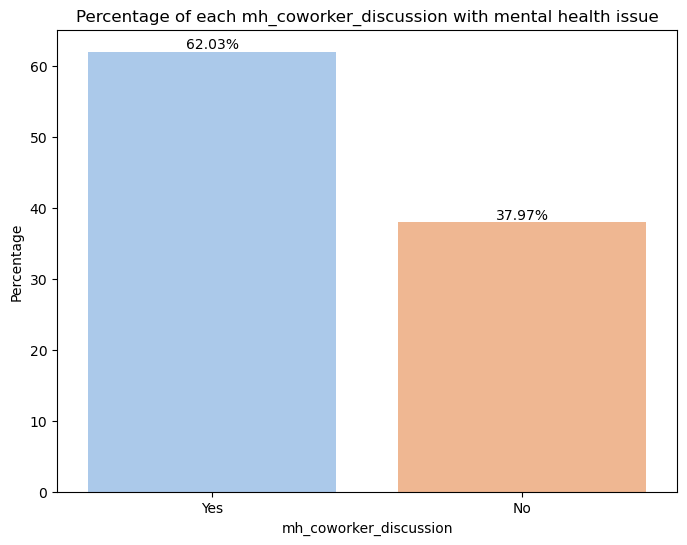

In [77]:
plot_mental_health_percentage(df,'mental_health','mh_coworker_discussion',colors)

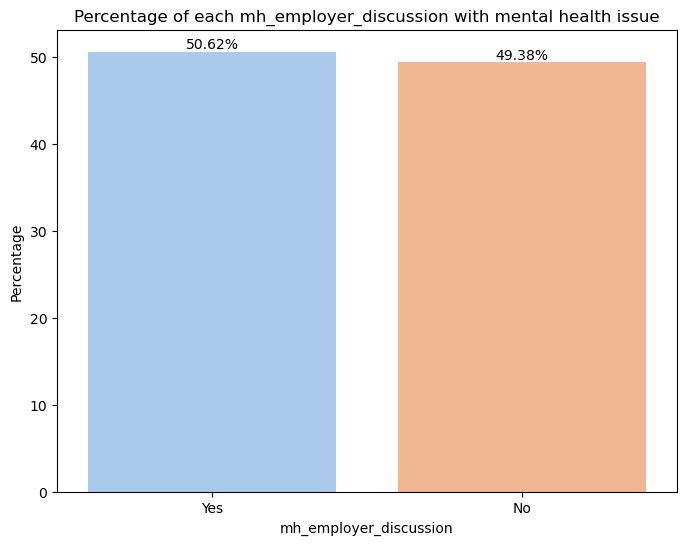

In [78]:
plot_mental_health_percentage(df,'mental_health','mh_employer_discussion',colors)

In [79]:
chi_squared_test(df, 'mh_employer_discussion', 'mental_health')

mh_employer_discussion has a significant relationship with the  mental_health  variable.


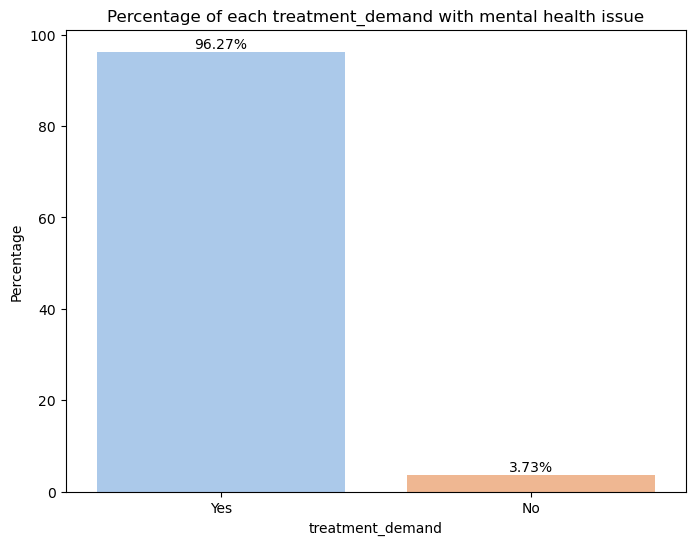

In [80]:
plot_mental_health_percentage(df,'mental_health','treatment_demand',colors)

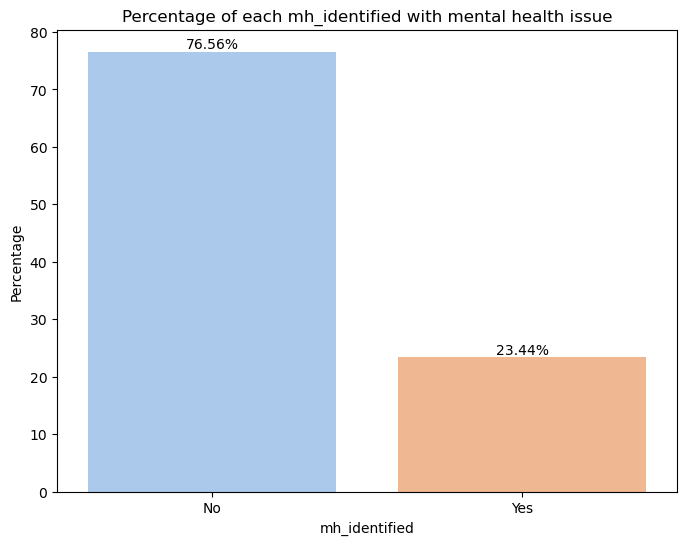

In [81]:
plot_mental_health_percentage(df,'mental_health','mh_identified',colors)

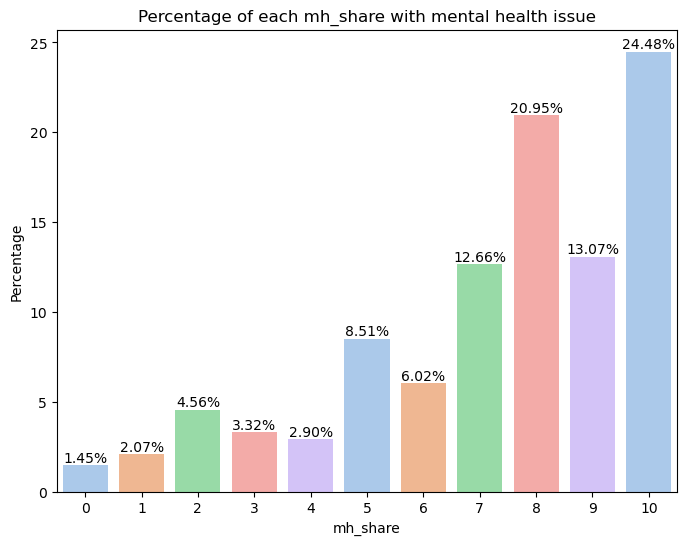

In [82]:
plot_mental_health_percentage(df,'mental_health','mh_share',colors)

# Feature Engineering 

In [83]:
df['country'].unique()

array(['United Kingdom', 'United States of America', 'Switzerland',
       'Russia', 'Germany', 'Canada', 'Iceland', 'Japan', 'Portugal',
       'Czech Republic', 'Finland', 'Australia', 'Sweden', 'Spain',
       'Hungary', 'Italy', 'France', 'Netherlands', 'New Zealand',
       'Austria', 'Turkey', 'Norway', 'Ireland', 'Mauritius', 'Pakistan',
       'Brazil', 'Estonia', 'Mexico', 'Poland', 'India', 'Philippines',
       'Indonesia', 'Macedonia', 'Kenya', 'Colombia'], dtype=object)

In [84]:
country_continent_mapping = {'United States of America': 'North America','United Kingdom': 'Europe','India': 'Asia',
    'Canada': 'North America','Germany': 'Europe','Brazil': 'South America','Netherlands': 'Europe','Spain': 'Europe',
    'Australia': 'Oceania', 'Portugal': 'Europe','France': 'Europe','Switzerland': 'Europe','Poland': 'Europe',
    'Ireland': 'Europe','South Africa': 'Africa','Mexico': 'North America','Norway': 'Europe','Italy': 'Europe',
    'New Zealand': 'Oceania','Slovenia': 'Europe','Turkey': 'Europe', 'Russia': 'Europe','Indonesia': 'Asia',
    'Macedonia': 'Europe','Japan': 'Asia','Pakistan': 'Asia','Sweden': 'Europe','Finland': 'Europe','Estonia': 'Europe',
    'Belgium': 'Europe','Colombia': 'South America','Greece': 'Europe','Austria': 'Europe','Serbia': 'Europe',
    'Romania': 'Europe','Philippines': 'Asia','Bangladesh': 'Asia','Ukraine': 'Europe','Iceland': 'Europe','Bulgaria': 'Europe',
    'Nigeria': 'Africa','Mongolia': 'Asia','Hong Kong': 'Asia','Argentina': 'South America','Croatia': 'Europe',
    'Sri Lanka': 'Asia','Albania': 'Europe','Vietnam': 'Asia','Egypt': 'Africa','Taiwan': 'Asia','Algeria': 'Africa',
    'Malaysia': 'Asia','Kenya': 'Africa','Belarus': 'Europe','Afghanistan': 'Asia','Czech Republic': 'Europe',
    'Botswana': 'Africa','Ghana': 'Africa','Other': 'Other','Ethiopia': 'Africa','Uruguay': 'South America',
    'Saudi Arabia': 'Asia','Mauritius': 'Africa','Latvia': 'Europe','Luxembourg': 'Europe','Slovakia': 'Europe',
    'Singapore': 'Asia','Swaziland': 'Africa','Hungary': 'Europe','China': 'Asia'
}
df['continent'] = df['country'].map(country_continent_mapping)
df.loc[df['continent'] == 'Other', 'continent'] = 'North America'

In [85]:
df.drop('country',axis=1,inplace=True)

In [86]:
category_cols = [x for x in df.columns if df[x].dtype == 'object']
print(f"Categorical columns : {category_cols}")
numerical_cols = list(df.select_dtypes(exclude='object'))
print('\n')
print(f"Numerical columns : {numerical_cols}")

Categorical columns : ['previous_employers', 'number_of_employees', 'Tech_now', 'Tech_past', 'benefits_now', 'benefits_past', 'workplace_resources_now', 'workplace_resources_past', 'mh_employer_discussion', 'mh_coworker_discussion', 'treatment_demand', 'family_history', 'medical_coverage', 'mh_identified', 'gender', 'mental_health', 'continent']


Numerical columns : ['mh_share', 'age']


In [87]:
for c in category_cols:
    chi_squared_test(df, c, 'mental_health')

previous_employers does not have a significant relationship with the mental_health   variable.
number_of_employees has a significant relationship with the  mental_health  variable.
Tech_now does not have a significant relationship with the mental_health   variable.
Tech_past has a significant relationship with the  mental_health  variable.
benefits_now has a significant relationship with the  mental_health  variable.
benefits_past has a significant relationship with the  mental_health  variable.
workplace_resources_now does not have a significant relationship with the mental_health   variable.
workplace_resources_past has a significant relationship with the  mental_health  variable.
mh_employer_discussion has a significant relationship with the  mental_health  variable.
mh_coworker_discussion has a significant relationship with the  mental_health  variable.
treatment_demand has a significant relationship with the  mental_health  variable.
family_history has a significant relationship w

In [88]:
df.drop('previous_employers',axis=1,inplace=True)
df.drop('Tech_now',axis=1,inplace=True)
df.drop('medical_coverage',axis=1,inplace=True)

In [89]:
category_cols = [x for x in df.columns if df[x].dtype == 'object']

In [90]:
for c in category_cols : 
    print('The unique values for the column ',c,' are :',df[c].unique())

The unique values for the column  number_of_employees  are : ['100-500' 'More than 1000' '6-25' '26-100' '1-5' '500-1000']
The unique values for the column  Tech_past  are : ['No' 'Yes']
The unique values for the column  benefits_now  are : ['Yes' 'No' "I don't know"]
The unique values for the column  benefits_past  are : ["I don't know" 'Yes' 'No']
The unique values for the column  workplace_resources_now  are : ["I don't know" 'No' 'Yes']
The unique values for the column  workplace_resources_past  are : ['Yes' 'No']
The unique values for the column  mh_employer_discussion  are : ['No' 'Yes']
The unique values for the column  mh_coworker_discussion  are : ['Yes' 'No']
The unique values for the column  treatment_demand  are : ['Yes' 'No']
The unique values for the column  family_history  are : ['No' "I don't know" 'Yes']
The unique values for the column  mh_identified  are : ['No' 'Yes']
The unique values for the column  gender  are : ['female' 'male' 'other']
The unique values for the

In [91]:
df=df[df['mental_health']!='Possibly']
df=df[df['mental_health']!="Don't Know"]

In [92]:
columns_to_encode = df.columns[(df.columns != 'mental_health') & (df.columns != 'age')]

data = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
print(data.shape)
data.columns

(799, 38)


Index(['age', 'mental_health', 'number_of_employees_100-500',
       'number_of_employees_26-100', 'number_of_employees_500-1000',
       'number_of_employees_6-25', 'number_of_employees_More than 1000',
       'Tech_past_Yes', 'benefits_now_No', 'benefits_now_Yes',
       'benefits_past_No', 'benefits_past_Yes', 'workplace_resources_now_No',
       'workplace_resources_now_Yes', 'workplace_resources_past_Yes',
       'mh_employer_discussion_Yes', 'mh_coworker_discussion_Yes',
       'treatment_demand_Yes', 'family_history_No', 'family_history_Yes',
       'mh_share_1', 'mh_share_2', 'mh_share_3', 'mh_share_4', 'mh_share_5',
       'mh_share_6', 'mh_share_7', 'mh_share_8', 'mh_share_9', 'mh_share_10',
       'mh_identified_Yes', 'gender_male', 'gender_other', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [93]:
data['mental_health'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
data['mental_health'] = data['mental_health'].map({'Yes': 1, 'No': 0})

# Modeling

In [95]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [96]:
y = data['mental_health']
X = data.drop('mental_health',axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

Training Accuracy: 1.0
Validation Accuracy: 0.81875
Training F1 Score: 1.0
Validation F1 Score: 0.8497409326424872


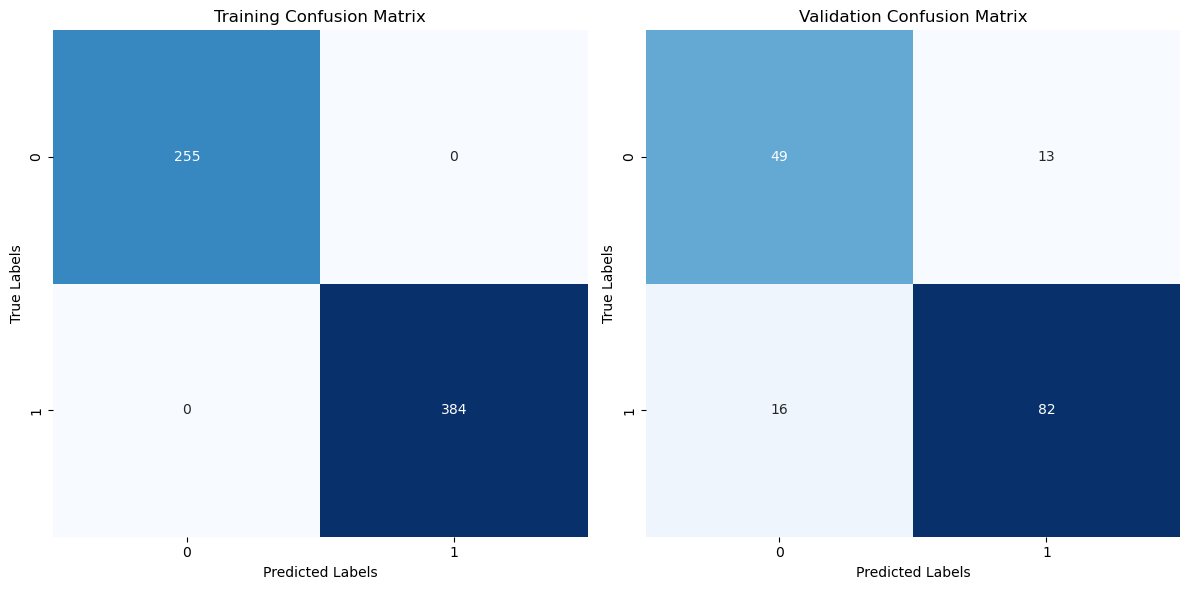

In [98]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_val)

train_f1 = f1_score(y_train, y_pred_train)
val_f1 = f1_score(y_test, y_pred_val)

train_conf_matrix = confusion_matrix(y_train, y_pred_train)
val_conf_matrix = confusion_matrix(y_test, y_pred_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)

plt.figure(figsize=(12, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Validation Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Training Accuracy: 1.0
Validation Accuracy: 0.89375
Training F1 Score: 1.0
Validation F1 Score: 0.914572864321608


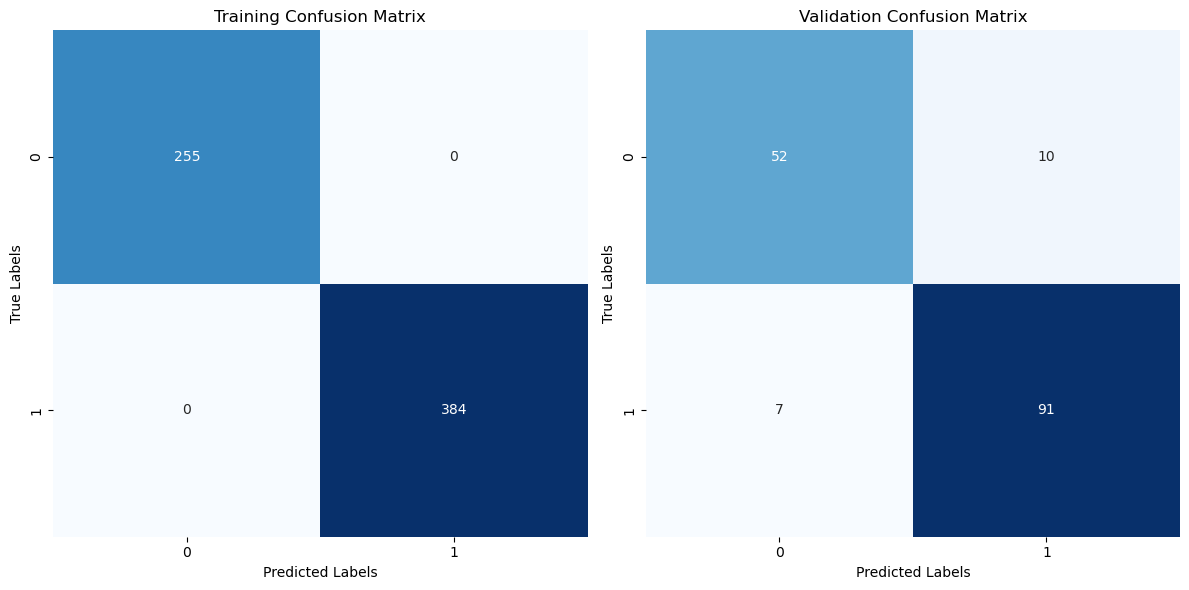

In [99]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_val)

train_f1 = f1_score(y_train, y_pred_train)
val_f1 = f1_score(y_test, y_pred_val)

train_conf_matrix = confusion_matrix(y_train, y_pred_train)
val_conf_matrix = confusion_matrix(y_test, y_pred_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)

plt.figure(figsize=(12, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Validation Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Training Accuracy: 1.0
Validation Accuracy: 0.875
Training F1 Score: 1.0
Validation F1 Score: 0.8947368421052632


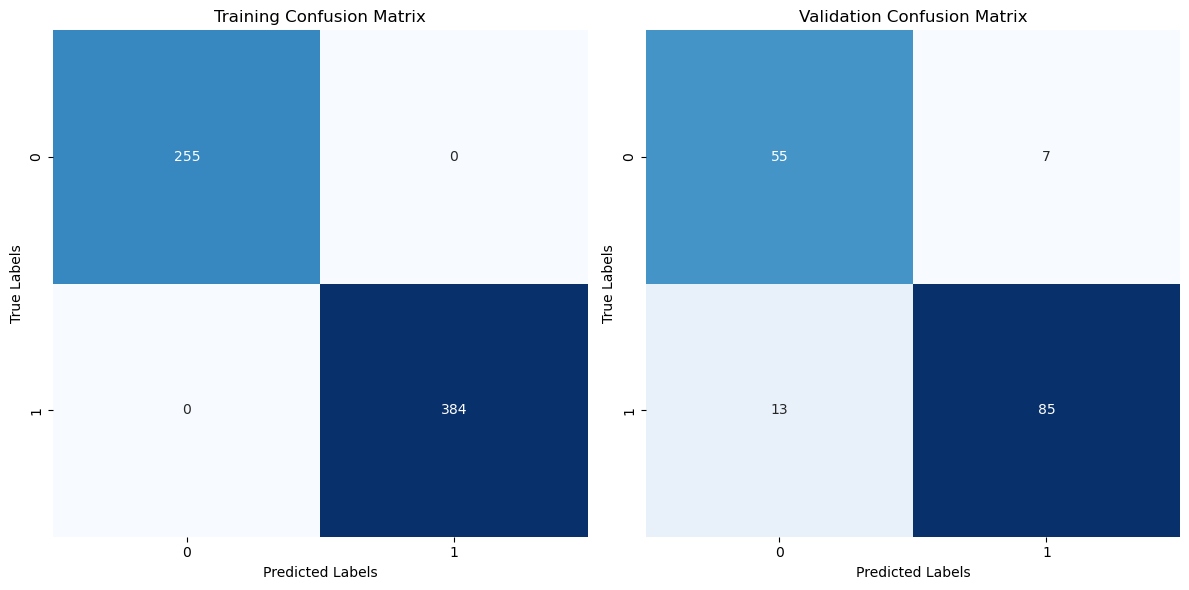

In [100]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_val)

train_f1 = f1_score(y_train, y_pred_train)
val_f1 = f1_score(y_test, y_pred_val)

train_conf_matrix = confusion_matrix(y_train, y_pred_train)
val_conf_matrix = confusion_matrix(y_test, y_pred_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)

plt.figure(figsize=(12, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Validation Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Learning rate set to 0.008509
0:	learn: 0.6859129	total: 154ms	remaining: 2m 33s
1:	learn: 0.6793340	total: 156ms	remaining: 1m 17s
2:	learn: 0.6730113	total: 158ms	remaining: 52.4s
3:	learn: 0.6665920	total: 160ms	remaining: 39.7s
4:	learn: 0.6606545	total: 162ms	remaining: 32.2s
5:	learn: 0.6534894	total: 164ms	remaining: 27.1s
6:	learn: 0.6465652	total: 166ms	remaining: 23.5s
7:	learn: 0.6405890	total: 168ms	remaining: 20.8s
8:	learn: 0.6349292	total: 169ms	remaining: 18.6s
9:	learn: 0.6286332	total: 171ms	remaining: 16.9s
10:	learn: 0.6230617	total: 173ms	remaining: 15.5s
11:	learn: 0.6165950	total: 175ms	remaining: 14.4s
12:	learn: 0.6111749	total: 177ms	remaining: 13.4s
13:	learn: 0.6055845	total: 179ms	remaining: 12.6s
14:	learn: 0.5994807	total: 181ms	remaining: 11.9s
15:	learn: 0.5942981	total: 183ms	remaining: 11.2s
16:	learn: 0.5896930	total: 185ms	remaining: 10.7s
17:	learn: 0.5848021	total: 187ms	remaining: 10.2s
18:	learn: 0.5794810	total: 189ms	remaining: 9.73s
19:	learn

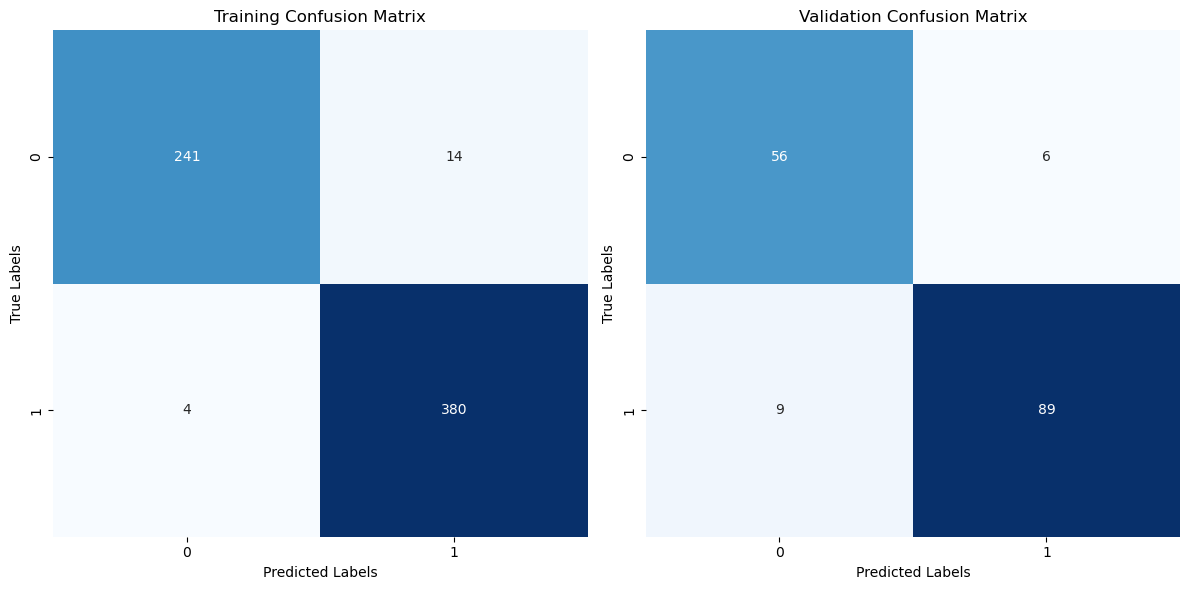

In [101]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_val)

train_f1 = f1_score(y_train, y_pred_train)
val_f1 = f1_score(y_test, y_pred_val)

train_conf_matrix = confusion_matrix(y_train, y_pred_train)
val_conf_matrix = confusion_matrix(y_test, y_pred_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)

plt.figure(figsize=(12, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Validation Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Training Accuracy: 0.9984350547730829
Validation Accuracy: 0.8875
Training F1 Score: 0.9986996098829649
Validation F1 Score: 0.9052631578947369


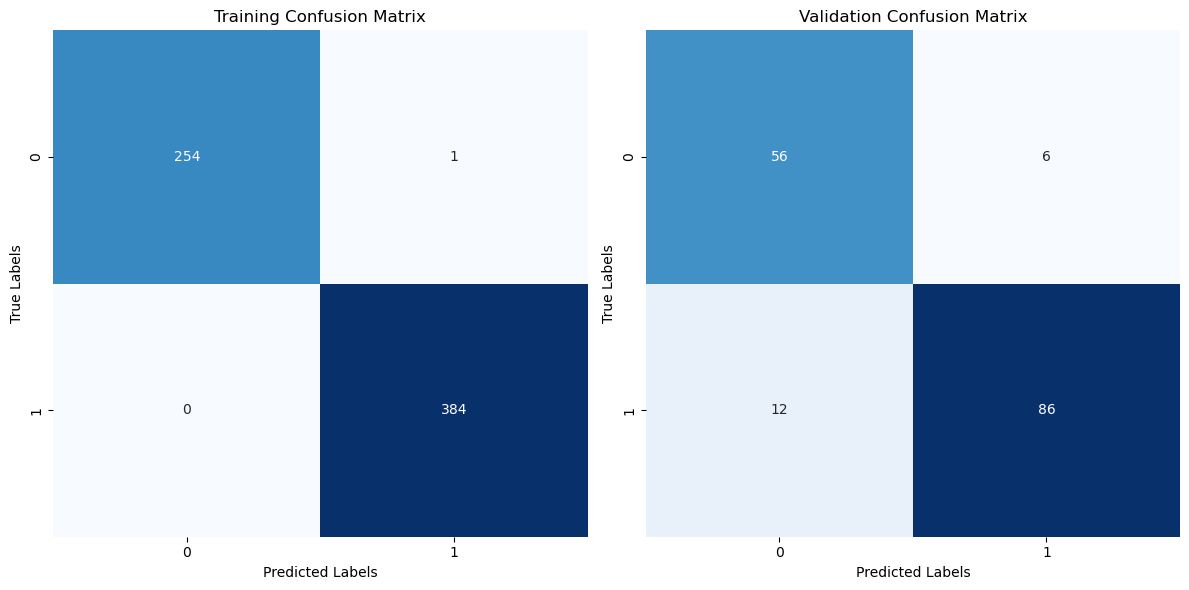

In [102]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_test, y_pred_val)

train_f1 = f1_score(y_train, y_pred_train)
val_f1 = f1_score(y_test, y_pred_val)

train_conf_matrix = confusion_matrix(y_train, y_pred_train)
val_conf_matrix = confusion_matrix(y_test, y_pred_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training F1 Score:", train_f1)
print("Validation F1 Score:", val_f1)

plt.figure(figsize=(12, 6))

# Training Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Validation Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

In [103]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 4, 5],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'colsample_bylevel': [0.8, 0.9, 1.0]
}
model = CatBoostClassifier()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

0:	learn: 0.6853724	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6777131	total: 3.86ms	remaining: 1.93s
2:	learn: 0.6701680	total: 4.99ms	remaining: 1.66s
3:	learn: 0.6628246	total: 6.16ms	remaining: 1.53s
4:	learn: 0.6556471	total: 7.26ms	remaining: 1.45s
5:	learn: 0.6479501	total: 8.4ms	remaining: 1.39s
6:	learn: 0.6412758	total: 9.46ms	remaining: 1.34s
7:	learn: 0.6344120	total: 10.6ms	remaining: 1.31s
8:	learn: 0.6281365	total: 11.6ms	remaining: 1.27s
9:	learn: 0.6200068	total: 13.5ms	remaining: 1.34s
10:	learn: 0.6139625	total: 14.6ms	remaining: 1.31s
11:	learn: 0.6081955	total: 15.4ms	remaining: 1.27s
12:	learn: 0.6015131	total: 16.4ms	remaining: 1.25s
13:	learn: 0.5947779	total: 17.6ms	remaining: 1.24s
14:	learn: 0.5889801	total: 18.7ms	remaining: 1.23s
15:	learn: 0.5828315	total: 19.8ms	remaining: 1.22s
16:	learn: 0.5762374	total: 20.8ms	remaining: 1.21s
17:	learn: 0.5707173	total: 21.9ms	remaining: 1.2s
18:	learn: 0.5658130	total: 23ms	remaining: 1.19s
19:	learn: 0.5593614	total

Fold 1 

Train Accuracy: 0.94679186228482
Validation Accuracy: 0.86875
Train F1 Score: 0.9569620253164558
Validation F1 Score: 0.8934010152284264
-------------------

Fold 2 

Train Accuracy: 0.9389671361502347
Validation Accuracy: 0.89375
Train F1 Score: 0.9509433962264151
Validation F1 Score: 0.9128205128205129
-------------------

Fold 3 

Train Accuracy: 0.9389671361502347
Validation Accuracy: 0.88125
Train F1 Score: 0.9517923362175525
Validation F1 Score: 0.8994708994708994
-------------------

Fold 4 

Train Accuracy: 0.945226917057903
Validation Accuracy: 0.9125
Train F1 Score: 0.9557522123893805
Validation F1 Score: 0.9292929292929293
-------------------

Fold 5 

Train Accuracy: 0.953125
Validation Accuracy: 0.8553459119496856
Train F1 Score: 0.961139896373057
Validation F1 Score: 0.8949771689497716
-------------------

Mean Over all folds : 0.8823191823899371
Mean F1 Score Over all folds : 0.905992505152508


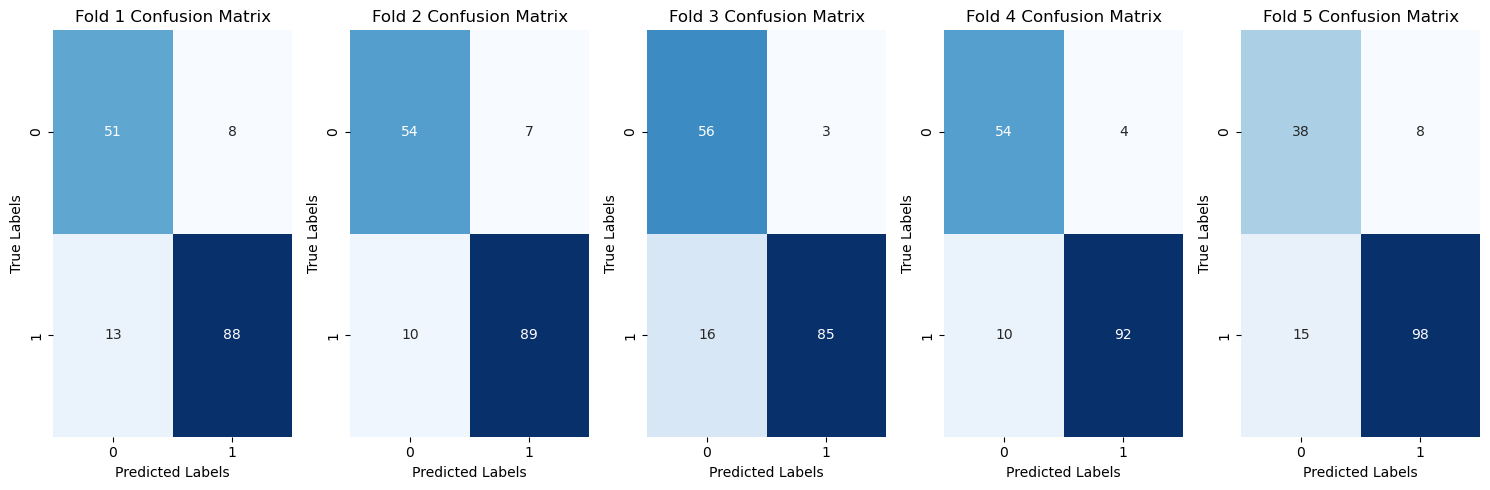

In [104]:
hyperparameters = {
    'colsample_bylevel': 1,
    'l2_leaf_reg': 1,
    'learning_rate': 0.01,
    'max_depth': 4
}
model = CatBoostClassifier(**hyperparameters)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
val_acc = []
val_f1 = []
val_conf_matrices = []

for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train, verbose=False)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_acc = accuracy_score(train_preds, y_train)
    test_acc = accuracy_score(val_preds, y_val)
    
    train_f1 = f1_score(train_preds, y_train)
    test_f1 = f1_score(val_preds, y_val)
    
    train_conf_matrix = confusion_matrix(train_preds, y_train)
    val_conf_matrix = confusion_matrix(val_preds, y_val)
    
    val_acc.append(test_acc)
    val_f1.append(test_f1)
    val_conf_matrices.append(val_conf_matrix)
    
    print(f'Fold {i+1} \n')
    print(f'Train Accuracy: {train_acc}')
    print(f'Validation Accuracy: {test_acc}')
    print(f'Train F1 Score: {train_f1}')
    print(f'Validation F1 Score: {test_f1}')
    print('-------------------\n')

print(f"Mean Over all folds : {np.mean(val_acc)}")
print(f"Mean F1 Score Over all folds : {np.mean(val_f1)}")

# Plotting Confusion Matrices
plt.figure(figsize=(15, 5))
for i, conf_matrix in enumerate(val_conf_matrices):
    plt.subplot(1, 5, i+1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Fold {i+1} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
plt.tight_layout()
plt.show()